In [27]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import os, sys
from importlib import reload

import numpy as np
import numpy.linalg as la
from numpy import fft

np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.io import fits
from astropy.table import Table
from astropy.visualization import AsinhStretch
from astropy.wcs import WCS
from astropy.nddata import Cutout2D
from astropy.visualization import astropy_mpl_style
from astropy.stats import sigma_clipped_stats
from astropy.nddata import NDData

stretch = AsinhStretch()

from photutils.detection import DAOStarFinder
from photutils.psf import EPSFBuilder
from photutils.psf import extract_stars

import matplotlib as mpl
import matplotlib.pyplot as plt

plt.style.use(astropy_mpl_style)
plt.rcParams['image.origin'] = 'lower'
plt.rcParams['image.interpolation'] = 'none'



In [2]:
sys.path.append('.')

import autils

Load some test data

In [3]:
from astropy.utils.data import download_file

image_file = download_file('http://data.astropy.org/tutorials/FITS-images/HorseHead.fits', cache=True )
# image_data = fits.getdata(image_file)
with fits.open(image_file) as hdu: 
    image_data = hdu[0].data
    image_header = hdu[0].header
    image_wcs = WCS(image_header)

In [161]:
reload(autils)

autils.interactive_plot(image_data, wcs=image_wcs)

Output()

In [158]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS

# Load a FITS image
# Replace 'your_image.fits' with your actual FITS file
hdulist = fits.open(image_file)
data = hdulist[0].data
header = hdulist[0].header

# Create WCS object from the header
wcs = WCS(header)

# Close the FITS file
hdulist.close()

# Create a figure and a set of subplots with WCS projection
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=wcs)

# Plot the image data
im = ax.imshow(data, cmap='viridis', origin='lower')

# Add WCS grid
ax.grid(color='white', linestyle='--', linewidth=0.5)

# Customize axes
ax.coords[0].set_axislabel('Right Ascension (degrees)')  # RA label
dec_label = ax.coords[1].set_axislabel('Declination (degrees)')  # Set Dec label

# Hide the Dec label directly using the text object
dec_label.set_visible(False)

# Keep the grid enabled on the declination axis
ax.coords[1].grid(color='white', linestyle='--', linewidth=0.5)

# Add a colorbar
plt.colorbar(im, ax=ax, orientation='vertical', label='Pixel Values')

# Add a title
plt.title('Astronomical Image with WCS Coordinates (Dec Label Hidden)')

# Show the plot
plt.show()

AttributeError: 'NoneType' object has no attribute 'set_visible'

In [121]:
dir( ax.coords[1])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_auto_axislabel',
 '_clear_grid_contour',
 '_compute_ticks',
 '_coord_scale_to_deg',
 '_draw_axislabels',
 '_draw_grid',
 '_draw_ticks',
 '_fl_spacing',
 '_format_unit',
 '_formatter_locator',
 '_get_default_axislabel',
 '_get_gridline',
 '_grid_type',
 '_update_grid_contour',
 '_update_grid_lines',
 '_update_grid_lines_1d',
 '_update_ticks',
 'add_tickable_gridline',
 'axislabels',
 'coord_index',
 'coord_type',
 'coord_unit',
 'coord_wrap',
 'default_label',
 'display_minor_ticks',
 'dpi_transform',
 'format_coord',
 'formatter',
 'frame',
 'get_auto_axislabel',
 'get_axislabel',
 'get_axislabel_visibi

-6241.0 12918.0
-6241.0 12918.0


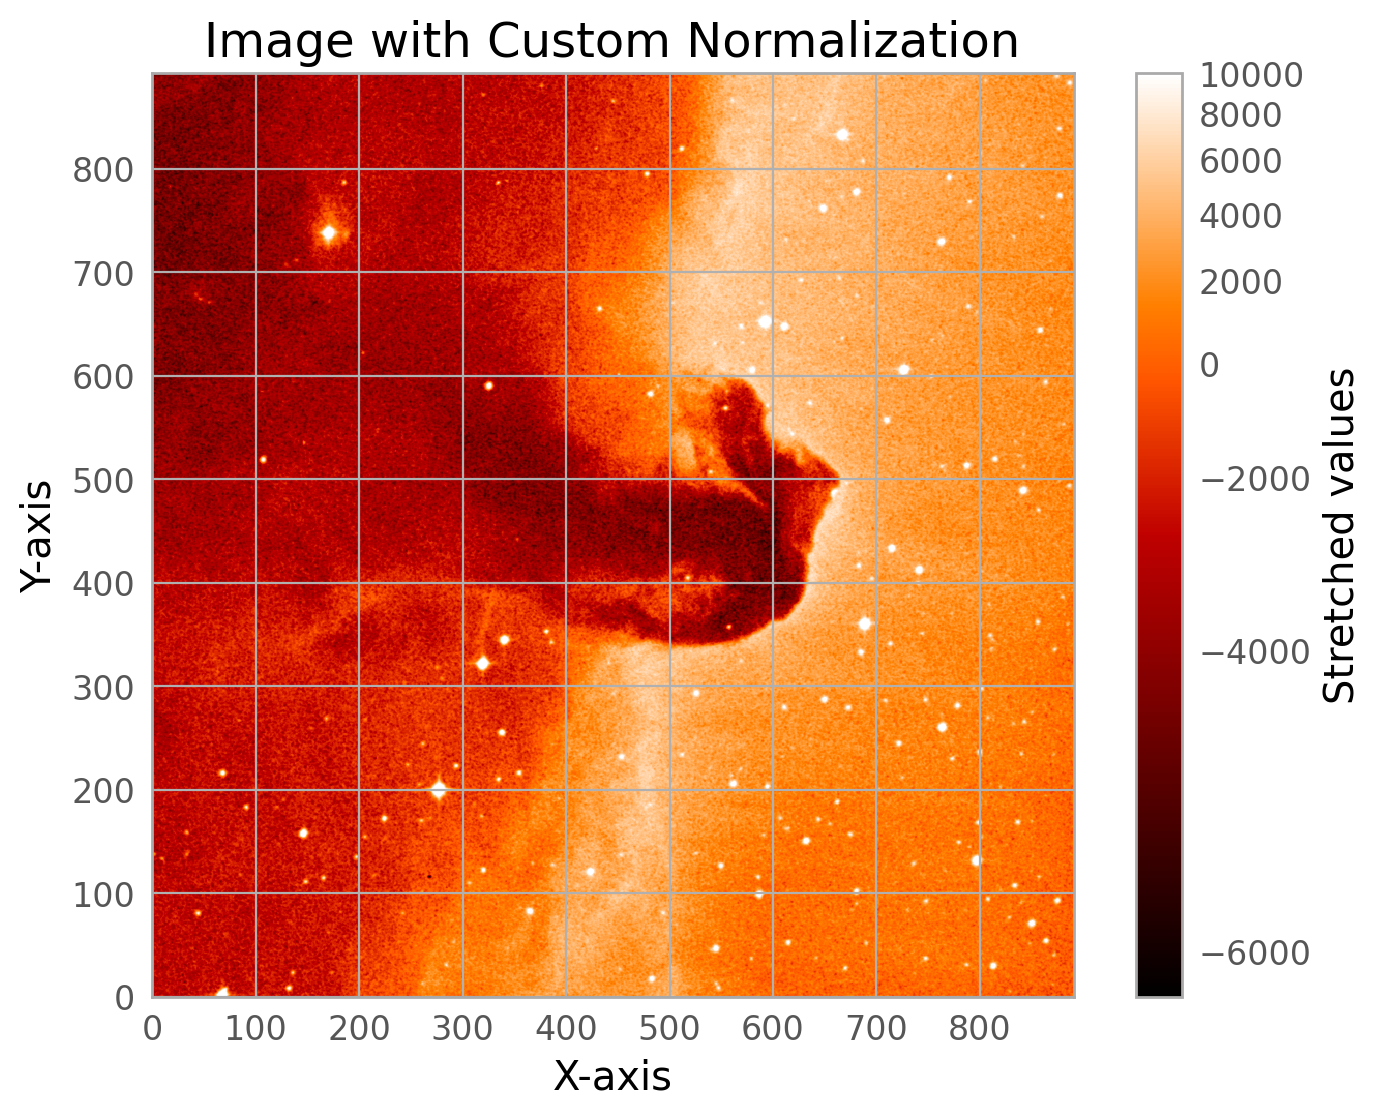

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize


from astropy.visualization import *


# Define a custom normalization class
class CustomNorm(Normalize):
    def __init__(self, stretch_func=None, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.stretch_func = stretch_func

    def __call__(self, value, clip=None):
        if self.stretch_func is not None:
            value = self.stretch_func(value)
        return super().__call__(value, clip)

# Define a stretching function (e.g., square root)
def stretch_function(x):
    # return np.arcsinh(x)
    return x*2

# Generate synthetic data (for example purposes)
# data = np.random.exponential(scale=1.0, size=(100, 100))  # Random data
data = image_data.astype(np.float64) - 10000
print(np.min(data), np.max(data))
# vmin = np.min(stretch_function(data))
# vmax = np.max(stretch_function(data))
vmin = np.min(data)
vmax = np.max(data)
print(vmin, vmax)


# Create a custom normalization instance with the stretch function
# norm = CustomNorm(stretch_func=stretch_function, vmin=vmin, vmax=vmax)


# Create an ImageNormalize instance with SinhStretch
norm = ImageNormalize(stretch=AsinhStretch(), vmin=vmin, vmax=10000)

# Create the plot
plt.figure(figsize=(8, 6))
plt.imshow(data, norm=norm)  # Apply custom norm
plt.colorbar(label='Stretched values')  # Add colorbar for reference
plt.title('Image with Custom Normalization')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()


In [145]:
doc = ax.coords[1].set_axislabel_visibility_rule.__doc__
print(doc)


        Set the rule used to determine when the axis label is drawn.

        Parameters
        ----------
        rule : str
            If the rule is 'always' axis labels will always be drawn on the
            axis. If the rule is 'ticks' the label will only be drawn if ticks
            were drawn on that axis. If the rule is 'labels' the axis label
            will only be drawn if tick labels were drawn on that axis.
        


In [159]:
doc = ax.coords[1].get_axislabel_visibility_rule.__doc__
print(doc)


        Get the rule used to determine when the axis label is drawn.
        


In [86]:
# ZScaleInterval(image_data)
zscale_interval = ZScaleInterval()
vmin, vmax = zscale_interval.get_limits(image_data)

vmin, vmax

(np.int16(4696), np.int16(18588))

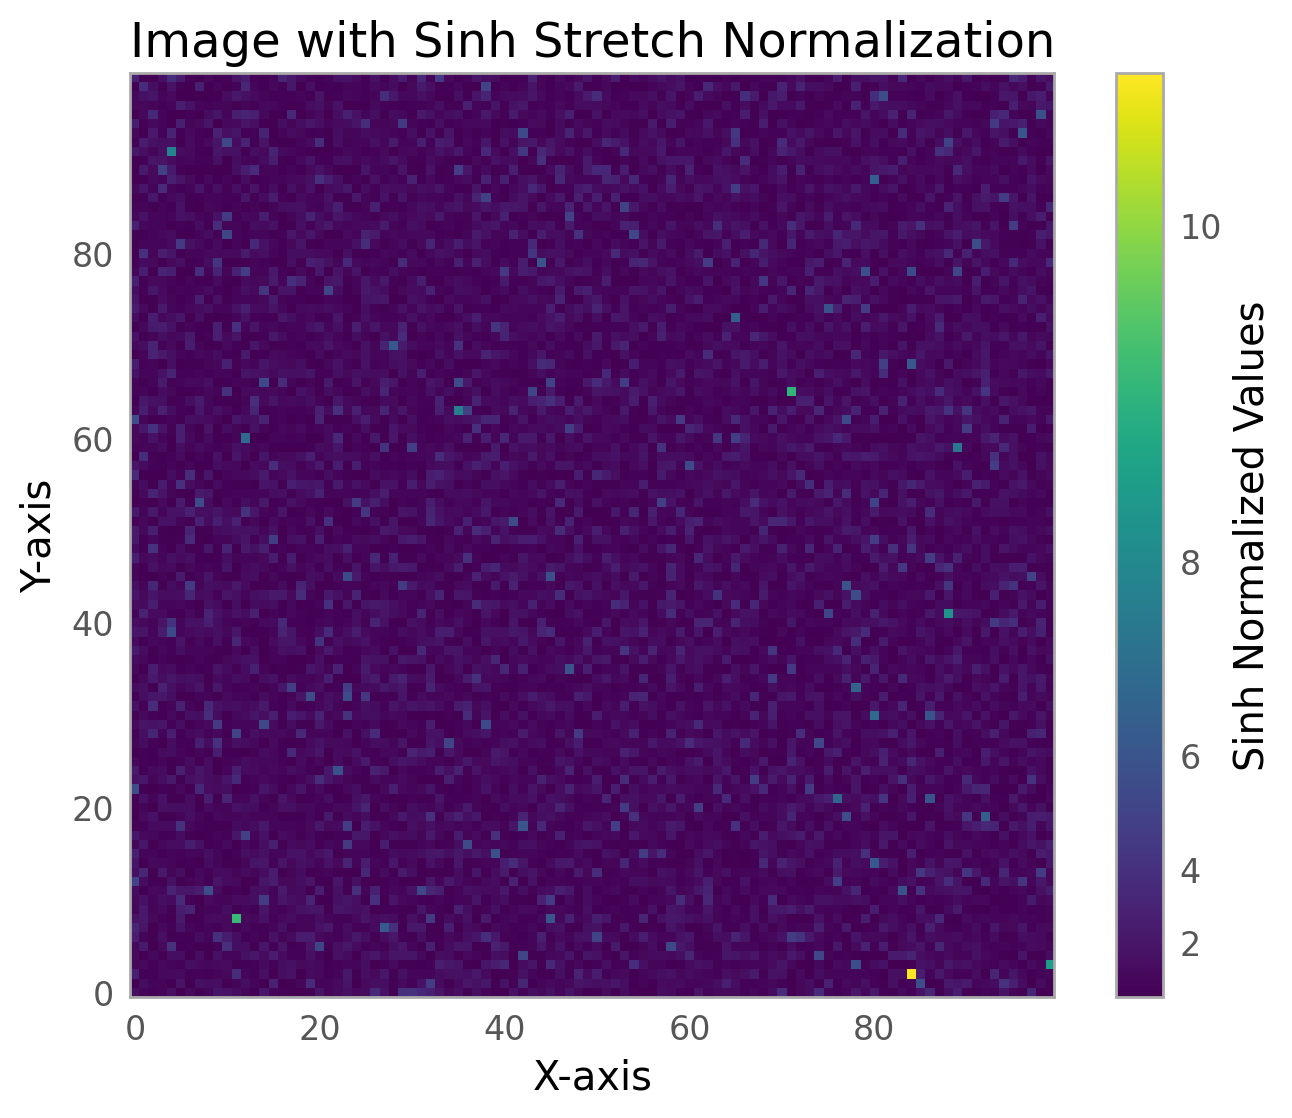

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import ImageNormalize, SinhStretch

# Generate synthetic data (for example purposes)
data = np.random.exponential(scale=1.0, size=(100, 100))  # Random data for demonstration

# Create an ImageNormalize instance with SinhStretch
norm = ImageNormalize(stretch=SinhStretch())

# Create a plot with the specified normalization
plt.figure(figsize=(8, 6))
plt.imshow(data, cmap='viridis', norm=norm)  # Apply the normalization
plt.colorbar(label='Sinh Normalized Values')  # Add colorbar for reference
plt.title('Image with Sinh Stretch Normalization')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(False)
plt.show()


In [87]:
dir(astropy.visualization)

['AsinhStretch',
 'AsymmetricPercentileInterval',
 'BaseInterval',
 'BaseStretch',
 'BaseTransform',
 'CompositeStretch',
 'CompositeTransform',
 'ContrastBiasStretch',
 'HistEqStretch',
 'ImageNormalize',
 'LinearStretch',
 'LogStretch',
 'ManualInterval',
 'MinMaxInterval',
 'PercentileInterval',
 'PowerDistStretch',
 'PowerStretch',
 'SinhStretch',
 'SqrtStretch',
 'SquaredStretch',
 'ZScaleInterval',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'astropy_mpl_style',
 'astropy_mpl_style_1',
 'hist',
 'imshow_norm',
 'interval',
 'lupton_rgb',
 'make_lupton_rgb',
 'mpl_normalize',
 'mpl_style',
 'np',
 'quantity_support',
 'simple_norm',
 'stretch',
 'time',
 'time_support',
 'transform',
 'units']

In [ ]:

    # # parse scaling method
    # if scale_method=='linear': 
    #     strech = lambda x: x
    # elif scale_method=='log':
    #     strech = np.log
    # elif scale_method=='power':
    #     strech = np.exp
    # elif scale_method=='sqrt':
    #     strech = np.sqrt
    # elif scale_method=='squared':
    #     strech = lambda x: x**2
    # elif scale_method=='asinh': 
    #     strech = np.arcsinh
    # elif scale_method=='sinh': 
    #     strech = np.sinh
    # elif scale_method=='histogram': 
    #     strech = NotImplemented
    # else: 
    #     strech = NotImplemented
    # norm = __CustomNorm(stretch_func=strech, vmin=np.min(data), vmax=np.max(data))

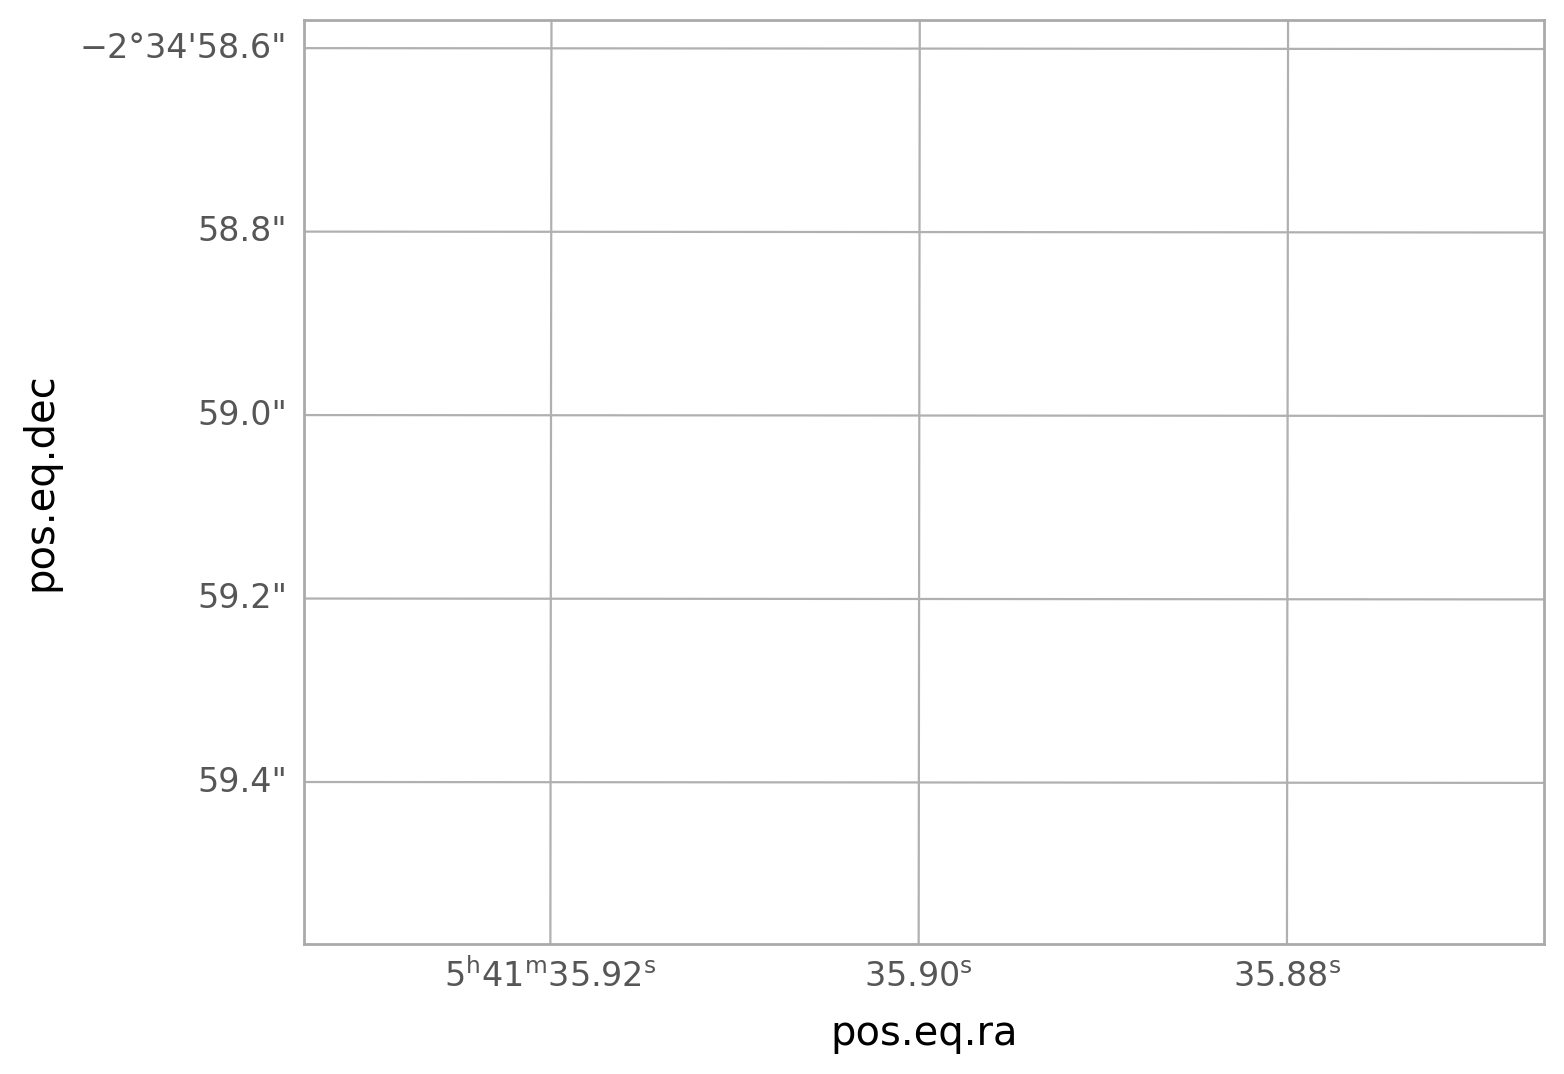

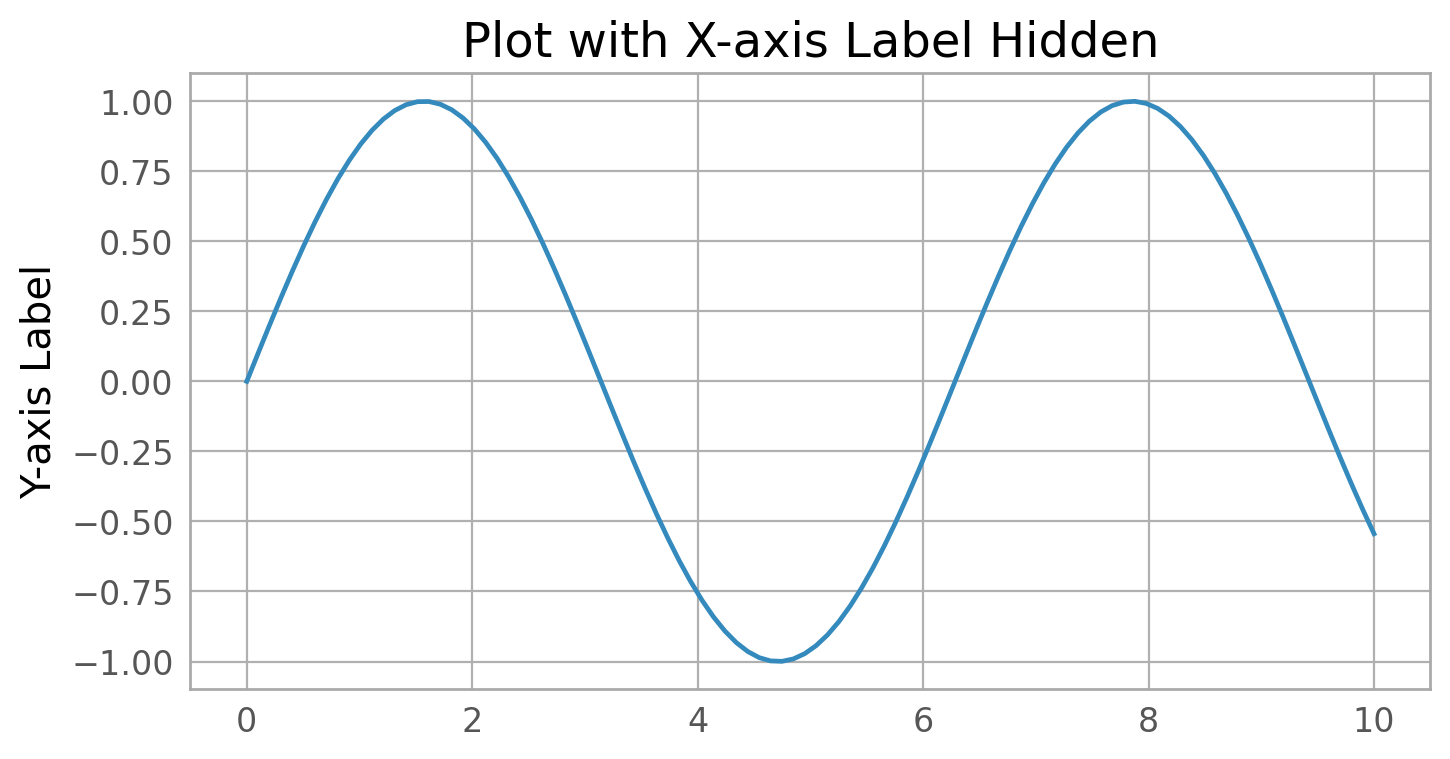

In [150]:
import numpy as np
import matplotlib.pyplot as plt

# Create some sample data
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Create the plot with Axes object
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(x, y)

# Set x and y axis labels
x_label = ax.set_xlabel('X-axis Label')  # Set a label to demonstrate
ax.set_ylabel('Y-axis Label')

# Hide the x-axis label using set_visible
x_label.set_visible(False)  # Hide the x-axis label

# Show the plot
ax.set_title('Plot with X-axis Label Hidden')
ax.grid(True)
plt.show()


In [171]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS

# Load a FITS image (replace with your actual FITS file)
hdulist = fits.open(image_file)
data = hdulist[0].data
header = hdulist[0].header

# Create WCS object from the header
wcs = WCS(header)

# Close the FITS file
hdulist.close()

# Create a figure and a set of subplots with WCS projection
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=wcs)

# Plot the image data
im = ax.imshow(data, cmap='viridis', origin='lower')

# Add WCS grid
ax.grid(color='white', linestyle='--', linewidth=0.5)

# Hide the axis labels (RA and Dec) but keep the tick labels visible
ax.coords[0].set_axislabel('')  # Hide the RA label
ax.coords[1].set_axislabel('')  # Hide the Dec label

# Hide the default axis label text (pos.eq.ra and pos.eq.dec)
ax.coords[0].label.set_visible(False)  # Hide the RA label text
ax.coords[1].label.set_visible(False)  # Hide the Dec label text

# Ensure tick labels remain visible for both RA and Dec coordinates
ax.coords[0].set_ticklabel_visible(True)  # Keep RA tick labels visible
ax.coords[1].set_ticklabel_visible(True)  # Keep Dec tick labels visible

# Keep the grid enabled on the axes
ax.coords[0].grid(color='white', linestyle='--', linewidth=0.5)
ax.coords[1].grid(color='white', linestyle='--', linewidth=0.5)

# Add a colorbar
plt.colorbar(im, ax=ax, orientation='vertical', label='Pixel Values')

# Add a title
plt.title('Astronomical Image with WCS Coordinates (RA and Dec Labels Hidden)')

# Show the plot
plt.show()

AttributeError: 'CoordinateHelper' object has no attribute 'label'

In [173]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS

# Load a FITS image (replace with your actual FITS file)
hdulist = fits.open(image_file)
data = hdulist[0].data
header = hdulist[0].header

# Create WCS object from the header
wcs = WCS(header)

# Close the FITS file
hdulist.close()

# Create a figure and a set of subplots with WCS projection
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=wcs)

# Plot the image data
im = ax.imshow(data, cmap='viridis', origin='lower')

# Add WCS grid
ax.grid(color='white', linestyle='--', linewidth=0.5)

# Set axis labels to empty strings to hide them
ax.coords[0].set_axislabel('RA (degrees)')  # Optional: Set RA label
ax.coords[1].set_axislabel('Dec (degrees)')  # Optional: Set Dec label

# Hide the actual labels
ax.coords[0].label.set_text('')  # Hide the RA label
ax.coords[1].label.set_text('')  # Hide the Dec label

# Keep the tick labels visible
ax.coords[0].set_ticklabel_visible(True)  # Keep RA tick labels visible
ax.coords[1].set_ticklabel_visible(True)  # Keep Dec tick labels visible

# Keep the grid enabled on the axes
ax.coords[0].grid(color='white', linestyle='--', linewidth=0.5)
ax.coords[1].grid(color='white', linestyle='--', linewidth=0.5)

# Add a colorbar
plt.colorbar(im, ax=ax, orientation='vertical', label='Pixel Values')

# Add a title
plt.title('Astronomical Image with WCS Coordinates (Labels Hidden)')

# Show the plot
plt.show()

AttributeError: 'CoordinateHelper' object has no attribute 'label'

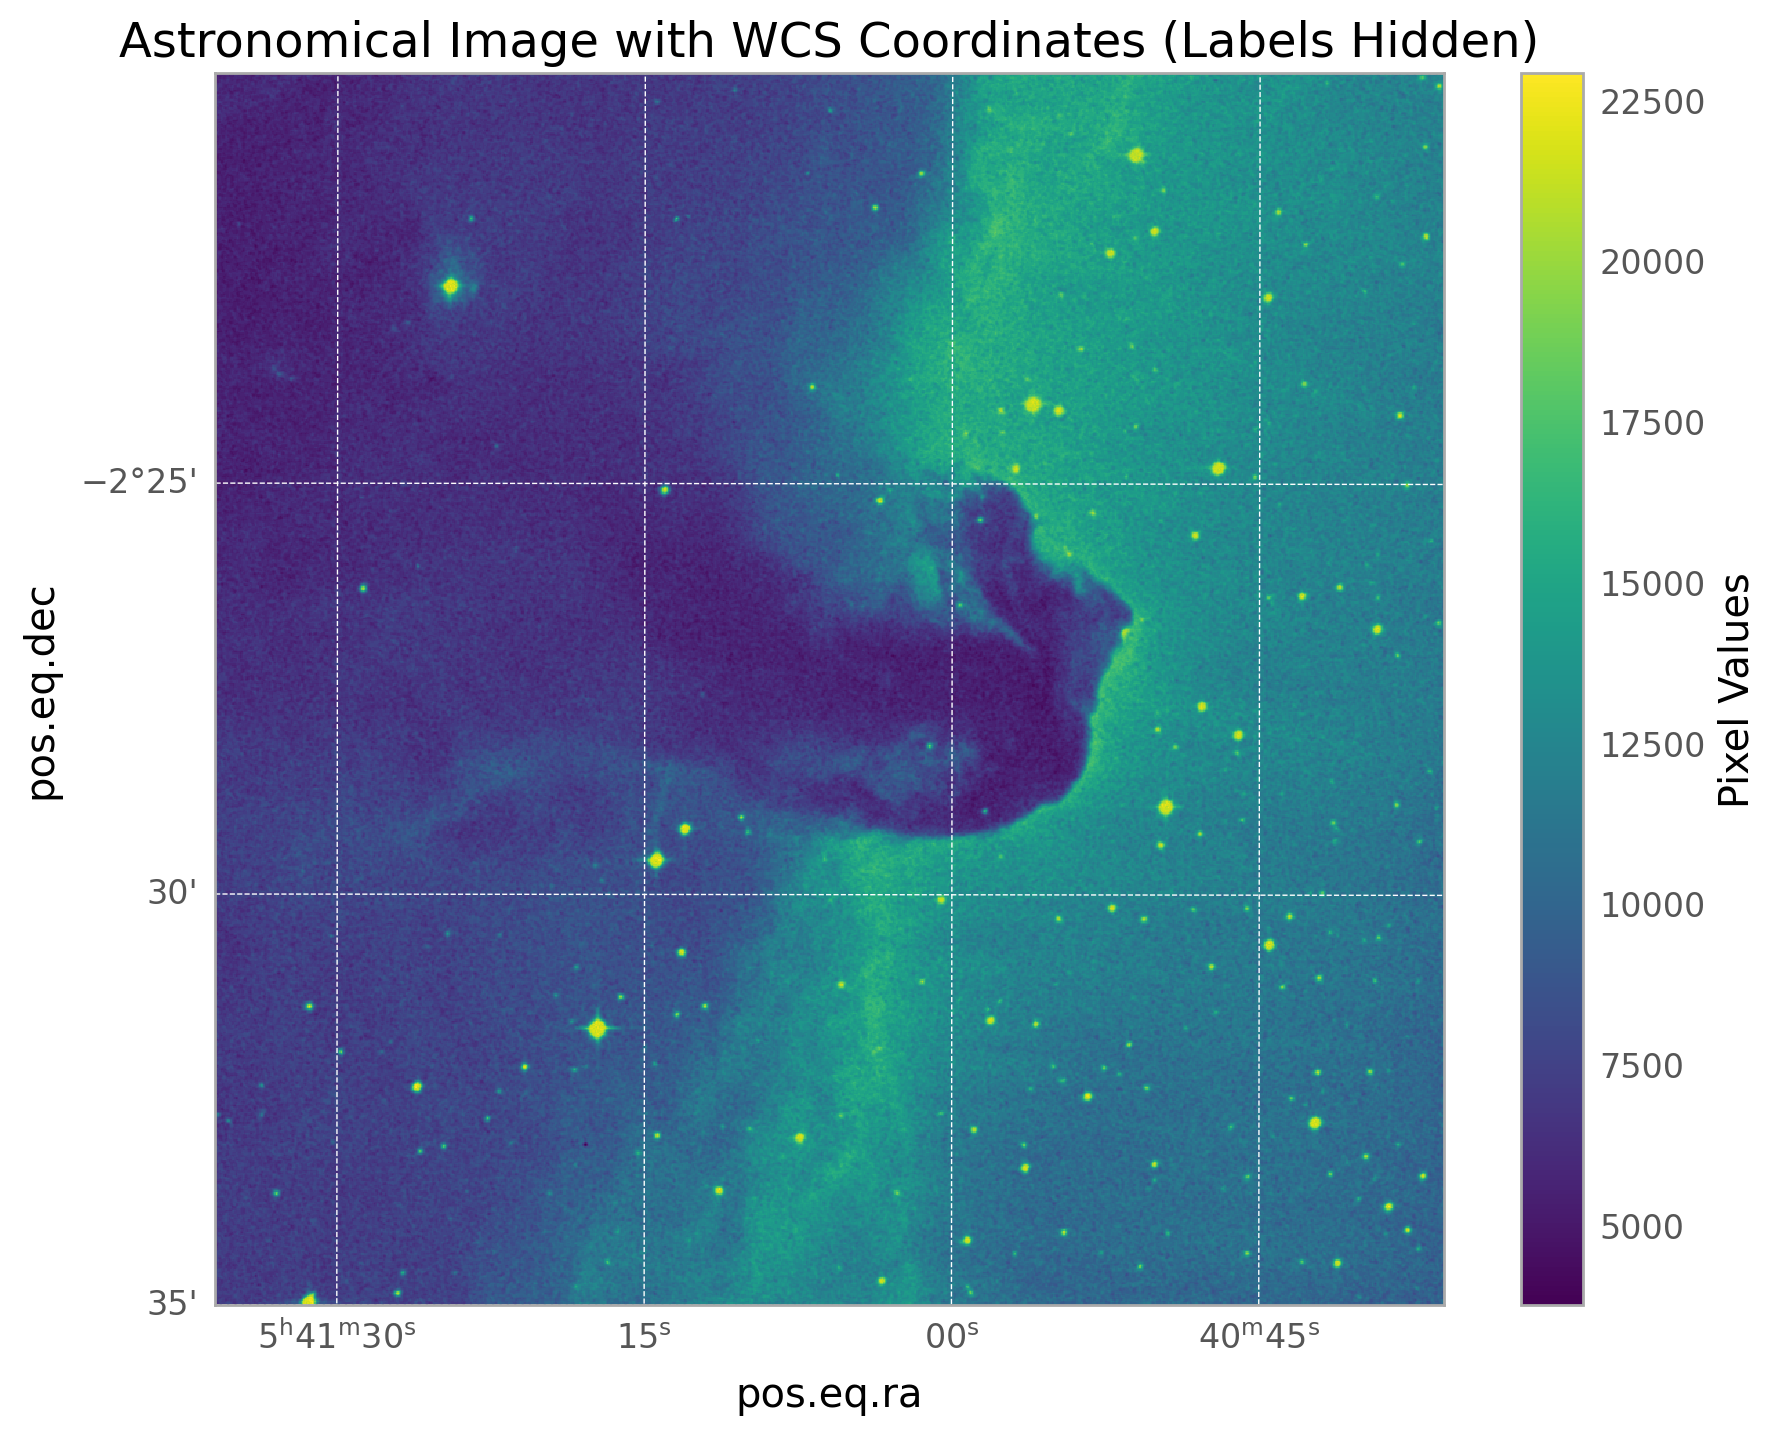

In [180]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS

# Load a FITS image (replace with your actual FITS file)
hdulist = fits.open(image_file)
data = hdulist[0].data
header = hdulist[0].header

# Create WCS object from the header
wcs = WCS(header)

# Close the FITS file
hdulist.close()

# Create a figure and a set of subplots with WCS projection
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=wcs)

# Plot the image data
im = ax.imshow(data, cmap='viridis', origin='lower')

# Add WCS grid
ax.grid(color='white', linestyle='--', linewidth=0.5)

# Set axis labels to empty strings to hide them
ax.coords[0].set_axislabel('')  # Hide the RA label
ax.coords[1].set_axislabel_visibility_rule('labels')
ax.set_ylabel('1')
ax.coords[1].set_axislabel('')  # Hide the Dec label

# Optionally, set the tick label format
# ax.coords[0].set_ticklabel_format(formatter='hh:mm:ss')  # RA in hours:minutes:seconds
# ax.coords[1].set_ticklabel_format(formatter='dd.dd')      # Dec in degrees

# Keep the grid enabled on the axes
ax.coords[0].grid(color='white', linestyle='--', linewidth=0.5)
ax.coords[1].grid(color='white', linestyle='--', linewidth=0.5)

# Add a colorbar
plt.colorbar(im, ax=ax, orientation='vertical', label='Pixel Values')

# Add a title
plt.title('Astronomical Image with WCS Coordinates (Labels Hidden)')

# Show the plot
plt.show()
